## Nonuniform Random Numbers

While common random number generators assume uniform probability for all possible numbers within a given range, in realistic situations we need random number generators that follow any probability distribution function. The Gaussian distribution is one example, where values closer to the mean are more probable. An exponentially decaying probability distribution would mean events earlier in time are more probable than events later.  
The **transformation method** takes a source of uniform random numbers and turns them into a nonuniform ones. If the probability of generating a uniform random number between $z$ and $z+dz$ is $q(z)dz$, where $q(z)=1$ is the uniform probability distribution, and the probability of generating a radndom value $x\equiv x(z)$ between $x$ and $x+dx$ is $p(x)dx$, where $p(x)$ can be any probability distribution, then $p(x)dx=q(z)dz$, by definition. We can generate $x$ from $z$ using:
$$ \int_0^{x(z)} p(x^\prime)\ dx^\prime = \int_0^z (1)\ dz^\prime = z$$
Calculating the integration on the left hand size and solving for $x$, gives $x$ as a function of $z$. Thus, we can *transform* uniform random numbers $z$ into nonuniform random numbers $x$.  
The probability of decay of a radioisotope in a time interval between $t$ and $t+dt$ is actually the probability of surviving until time $t$ and the probability of decay in interval $dt$. This gives
$$ p(t) = 2^{-t/\tau}\frac{\ln 2}{\tau}\ dt $$
Plugging this into the left hand side of the previous equation, we get
$$ x = -\frac{\tau}{\ln 2}\ln(1-z) $$

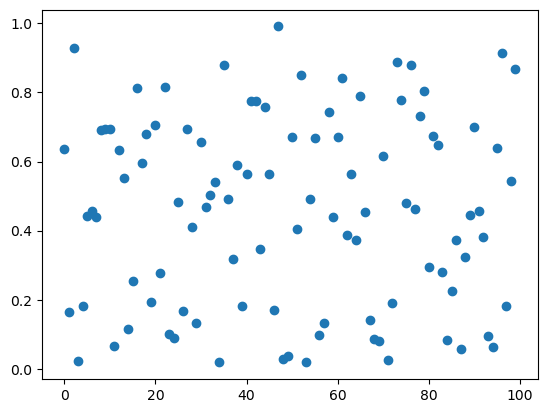

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

N = 100
tau = 3.053*60
mu = np.log(2)/tau

# generate uniform random numbers
# this represents the time of decay of a random atom
z = random(N)

plt.plot(z,marker='o',ls="")

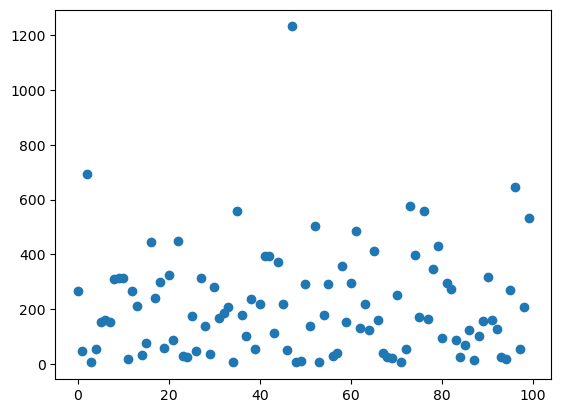

In [11]:
# transform that according to the probability distribution expected for radioactive decay
t_dec = -1/mu*np.log(1-z)
plt.plot(t_dec,marker='o',ls="")

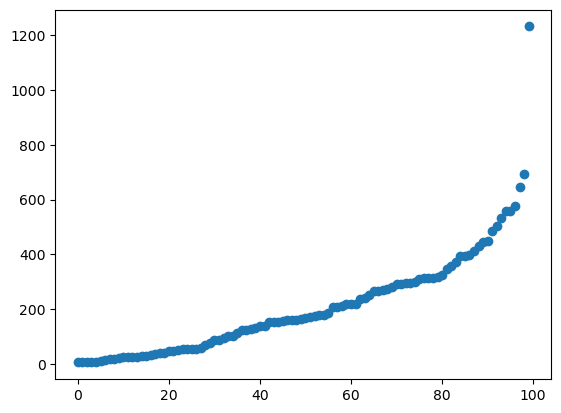

In [12]:
t_dec = np.sort(t_dec)     # numbers were generated at random so they must be sorted
plt.plot(t_dec,marker='o',ls="")

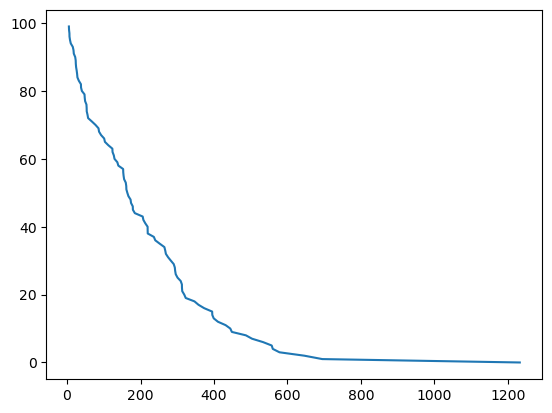

In [13]:
# creating an array to represent number of atoms decayed corresponding to a given t_dec
decayed = np.arange(1,N+1) 

survived = -decayed + N

plt.plot(t_dec,survived)

## Gaussian Random Numbers

Transformation method fails in the generation of Gaussian random numbers. This needs a little trick.  

Consider that $x$ and $y$ are drawn from a Gaussian distribution with standard deviation $\sigma$. In Cartesian coordinates, the probability that $(x,y)$ falls in some element $dx\ dy$ is $p(x)p(y)\ dx\ dy$. In polar coordinates, the same point falls in the area $r\ dr\ d\theta$ with a probability $p(r,\theta)\ dr\ d\theta = p(r)\ dr\times p(\theta)\ d\theta$ (see section 10.1.6).  

While $p(\theta)=1/(2\pi)$ is just a uniform distribution, $p(r)=(r/\sigma^2)\exp(-r^2/2\sigma^2)$ is an exponential distribution, which gives the transformed nonuniform variable as
$$ r = \sqrt{-2\sigma^2\ln(1-z)} $$
Once we generate nonuniform random variable $r$ and uniform random variable $\theta$ from the above distributions, we can find
$$ x = r\cos\theta, \qquad y = r\sin\theta $$
which are each random varibles that follow a Gaussian probability distribution!

### Rutherford Scattering

Consider a beam of a million $\alpha$ particles, with energy 7.7 MeV, fired at a gold atom. If we assume $x$ and $y$ to have Gaussian distributions, with standard deviation $\sigma=a_0/100$, where $a_0=5.29\times10^{-11}$ m is the Bohr radius, what is the fraction of particles that "bounce back" on scattering?  
The scattering angle is given by 
$$ \tan\frac{\theta}{2} = \frac{Ze^2}{2\pi\epsilon_0 Eb} $$
where $Z$ in the atomic number of the nucleus (=79 for gold), $e=1.6\times10^{-19}$ C is the electron charge, $\epsilon_0=8.85\times10^{-12}$ C$^2$ m$^{-2}$ N$^{-1}$ is the permittivity of free space, $E$ is the kinetic energy of the incident $\alpha$ particle (7.7 MeV here), and $b$ is the impact parameter. The bounce back event is when the scattering angle exceeds 90$^\circ$, that is, the impact parameter is less than
$$ b = \frac{Ze^2}{2\pi\epsilon_0 E} $$

In [21]:
# Constants
Z = 79
e = 1.602e-19
E = 7.7e6*e
epsilon0 = 8.854e-12
a0 = 5.292e-11
sigma = a0/100
N = 1000000

# Function to generate two Gaussian random numbers
def gaussian():
    r = np.sqrt(-2*sigma*sigma*np.log(1-random()))
    theta = 2*np.pi*random()
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return x,y

# Main program
count = 0
for i in range(N):
    x,y = gaussian()
    b   = np.sqrt(x*x+y*y)
    if b<Z*e*e/(2*np.pi*epsilon0*E):
        count += 1

print(count,"particles were reflected out of",N,", which is roughly 0.15%(",1e6*0.0015,")")

1610 particles were reflected out of 1000000 , which is roughly 0.15%( 1500.0 )
